### ***SVM - SUPPORT VECTOR MACHINE***

---

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

---

### ***Import data***

In [2]:
# Import dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


---

### ***Preprocessing***

In [3]:
# Get required data
data.drop(columns = ['User ID'], inplace=True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


---

### ***Describe***

In [4]:
# Describe data
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


---

### ***Distribution***

C:\Users\fv3\AppData\Local\Temp\ipykernel_22084\2902728827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

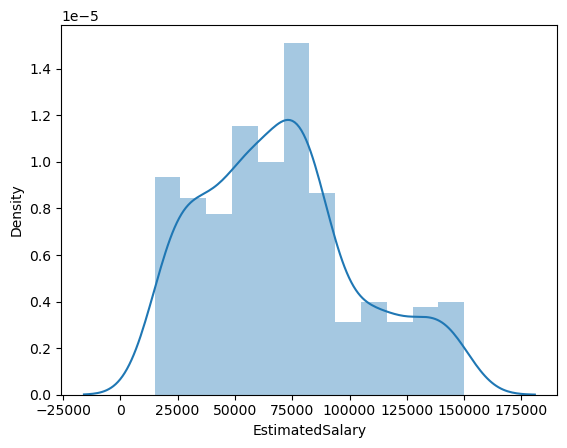

In [5]:
# Salary distribution
sns.distplot(data['EstimatedSalary'])

---

### ***Label encoding***

In [6]:
# Label encoding
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])

In [7]:
data['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

---

### ***Correlation matrix***

In [8]:
data.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


---

### ***Drop insignificant data***

<Axes: >

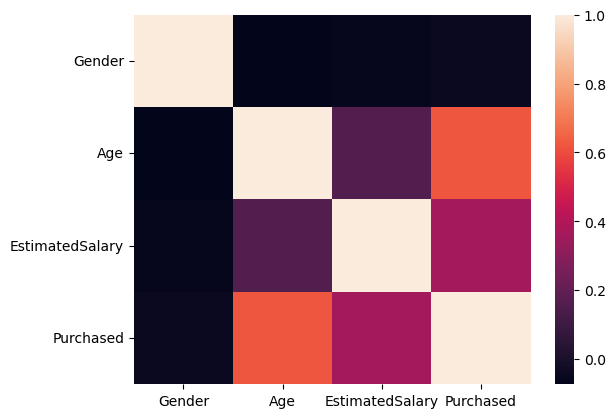

In [9]:
sns.heatmap(data.corr())

In [10]:
# Drop Gender column
data.drop(columns=['Gender'], inplace=True)

---

### ***Relationship***

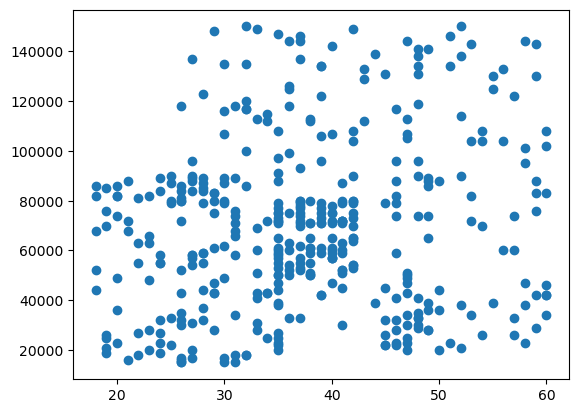

In [11]:
# Linear relationship between Age and Salary
plt.scatter(data['Age'], data['EstimatedSalary'])

---

### ***Split data***

In [12]:
# Split data into dependent/independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

---

### ***Test/Train sets***

In [13]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

---

### ***Feature scaling***

In [14]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

### ***Train model***

In [15]:
# Train Support Vector Machine model
classifier1 = SVC(kernel = 'linear', random_state = 0)
classifier1.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [16]:
# Train Support Vector Machine model
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(random_state=0)

In [17]:
# Train Support Vector Machine model
classifier3 = SVC(kernel = 'sigmoid', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [18]:
# Train Support Vector Machine model
classifier4 = SVC(kernel = 'poly', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

---

### ***Predict result / Score model***

In [19]:
# Prediction
y_pred = classifier1.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [20]:
# Prediction
y_pred = classifier2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [21]:
# Prediction
y_pred = classifier3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


In [22]:
# Prediction
y_pred = classifier4.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]]


---

### ***Evaluate model***

In [23]:
# Accuracy
accuracy_score(y_test, y_pred)

0.82

In [24]:
### Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [25]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.7692307692307693


<Axes: >

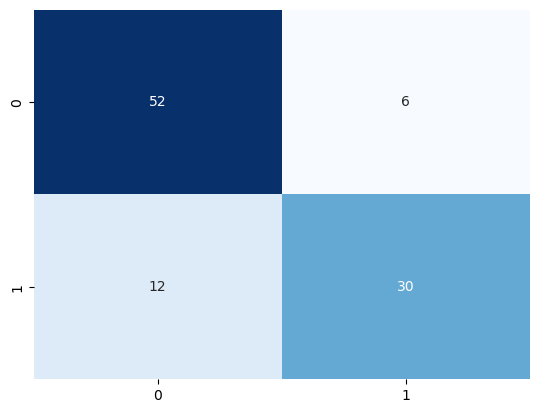

In [26]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

---

### ***Precision-Recall curve***

In [27]:
# 1. Initialize with probability enabled
classifier1 = SVC(kernel='rbf', probability=True) 

# 2. Re-fit the model
classifier1.fit(X_train, y_train)

# 3. Now predict_proba will work
y_pred_proba = classifier1.predict_proba(X_test)[:, 1]

In [28]:
# 1. Initialize with probability enabled
classifier2 = SVC(kernel='poly', probability=True) 

# 2. Re-fit the model
classifier2.fit(X_train, y_train)

# 3. Now predict_proba will work
y_pred_proba = classifier1.predict_proba(X_test)[:, 1]

In [29]:
# 1. Initialize with probability enabled
classifier3 = SVC(kernel='linear', probability=True) 

# 2. Re-fit the model
classifier3.fit(X_train, y_train)

# 3. Now predict_proba will work
y_pred_proba = classifier1.predict_proba(X_test)[:, 1]

In [30]:
# 1. Initialize with probability enabled
classifier4 = SVC(kernel='sigmoid', probability=True) 

# 2. Re-fit the model
classifier4.fit(X_train, y_train)

# 3. Now predict_proba will work
y_pred_proba = classifier1.predict_proba(X_test)[:, 1]

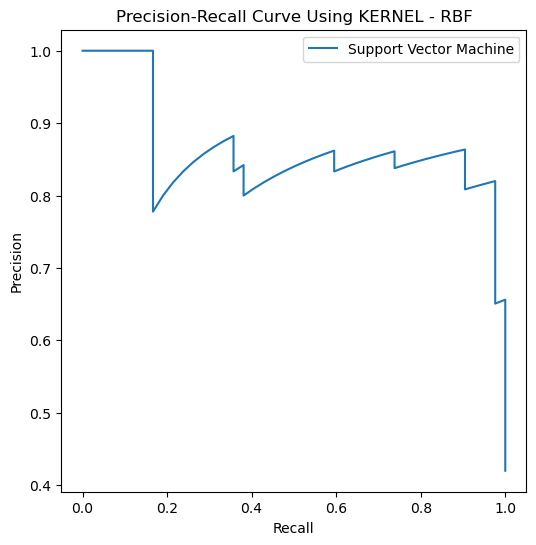

In [31]:
# Plot Precision-Recall Curve
y_pred_proba = classifier1.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve Using KERNEL - RBF')
ax.legend();

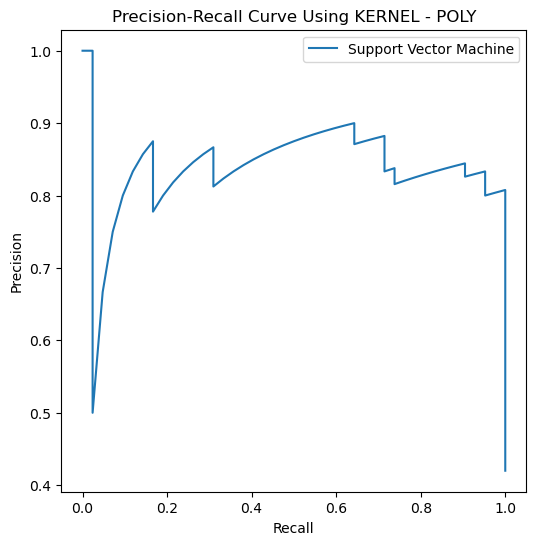

In [32]:
# Plot Precision-Recall Curve
y_pred_proba = classifier2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve Using KERNEL - POLY')
ax.legend();

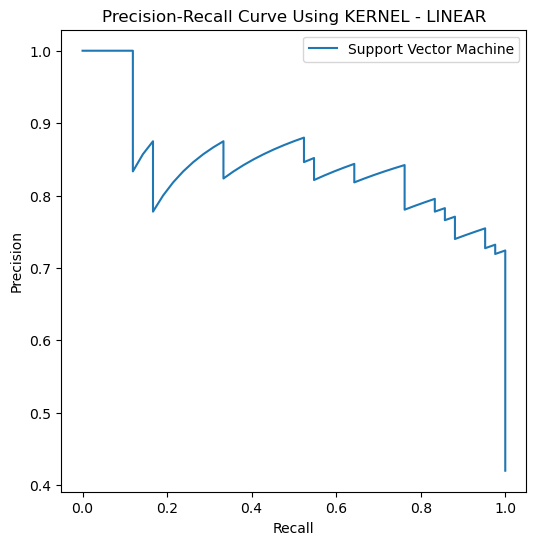

In [33]:
# Plot Precision-Recall Curve
y_pred_proba = classifier3.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve Using KERNEL - LINEAR')
ax.legend();

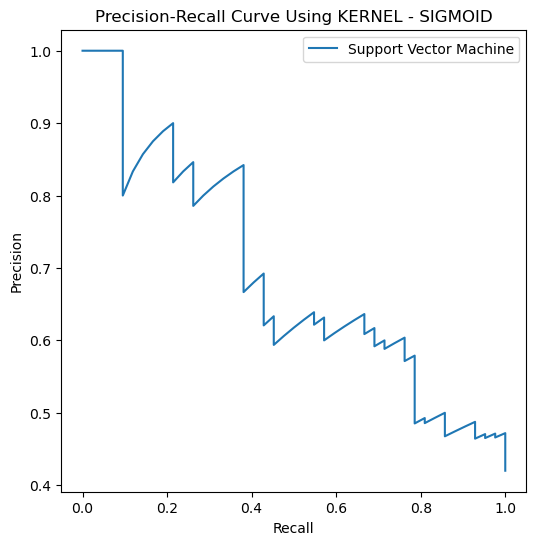

In [34]:
# Plot Precision-Recall Curve
y_pred_proba = classifier4.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve Using KERNEL - SIGMOID')
ax.legend();

### ***AUC/ROC curve***

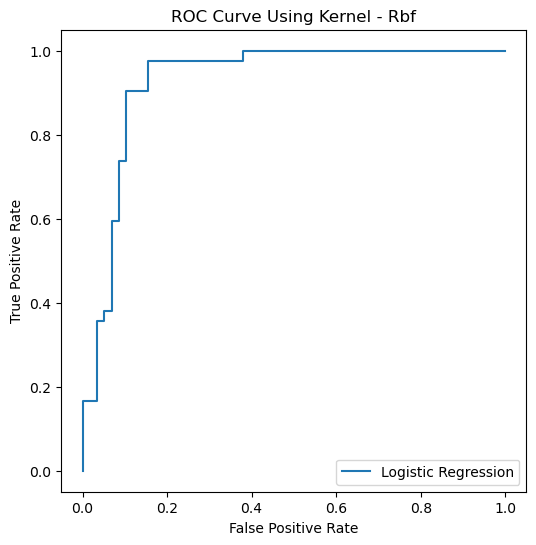

In [35]:
# Plot AUC/ROC curve
y_pred_proba = classifier1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Using Kernel - Rbf')
ax.legend();

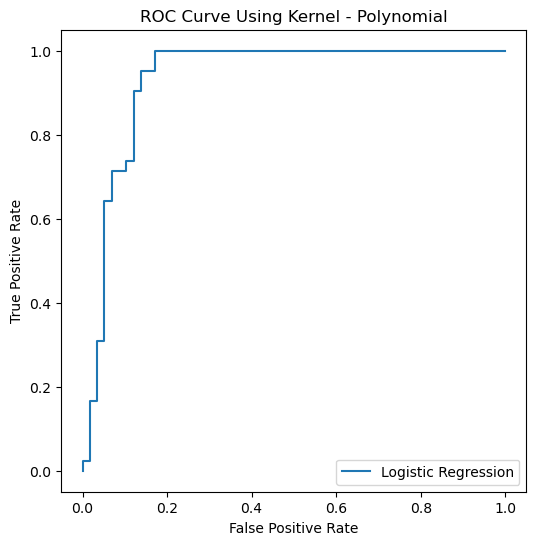

In [36]:
# Plot AUC/ROC curve
y_pred_proba = classifier2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Using Kernel - Polynomial')
ax.legend();

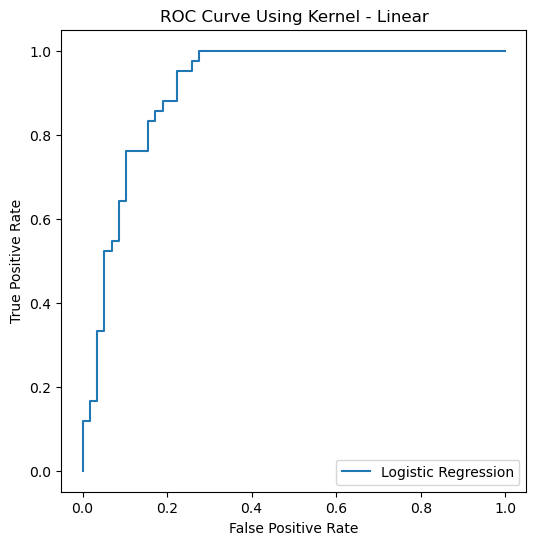

In [37]:
# Plot AUC/ROC curve
y_pred_proba = classifier3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Using Kernel - Linear')
ax.legend();

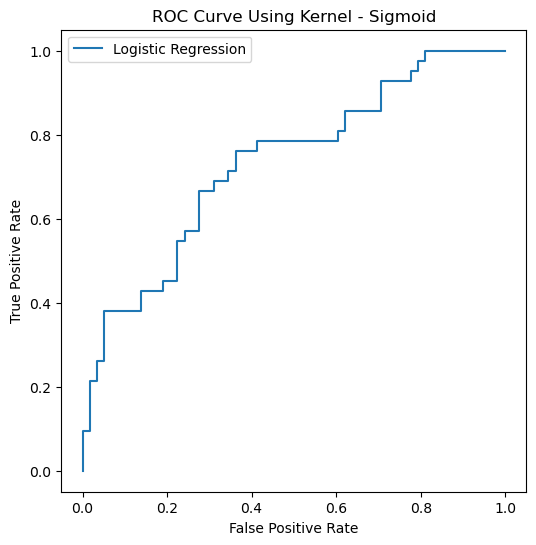

In [38]:
# Plot AUC/ROC curve
y_pred_proba = classifier4.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Using Kernel - Sigmoid')
ax.legend();

---

### ***Prediction results on training set***

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\2699243185.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


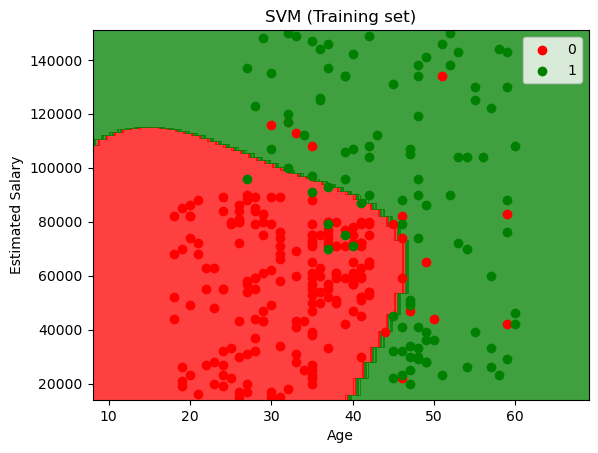

In [67]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier1.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\3729972532.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


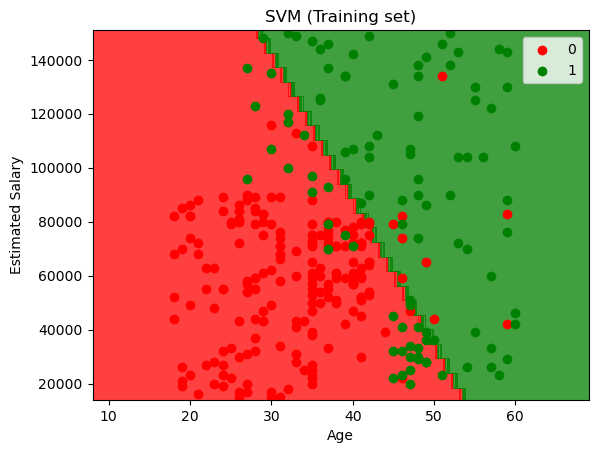

In [68]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\1692312303.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


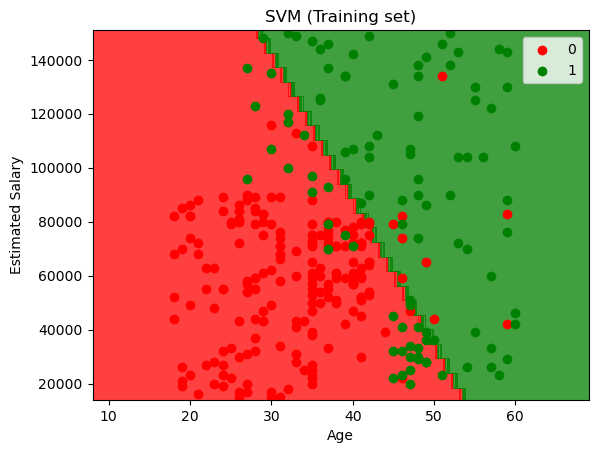

In [69]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\1758423837.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


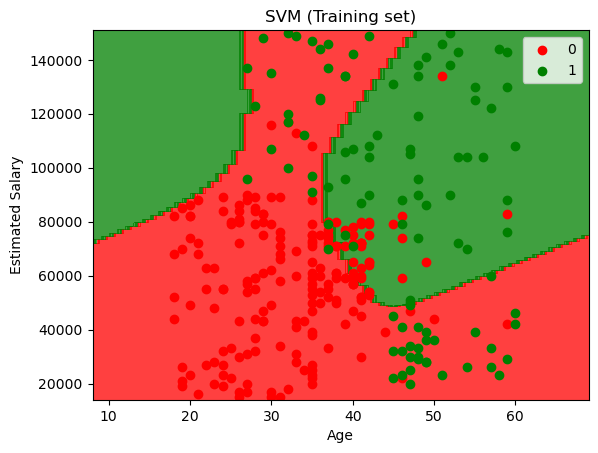

In [70]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier4.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

---

### ***Prediction results on test set***

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\3754897895.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


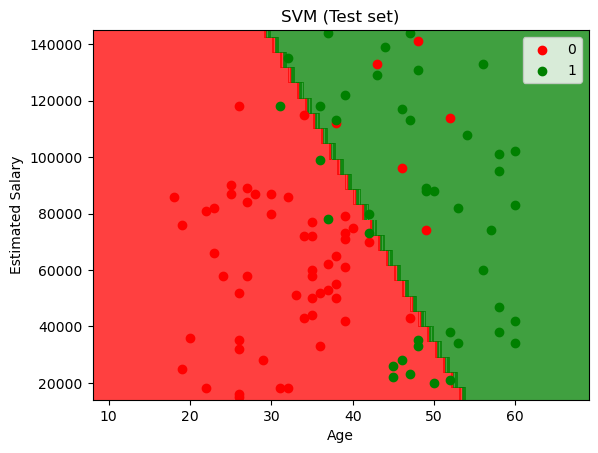

In [78]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier1.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\2197804772.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


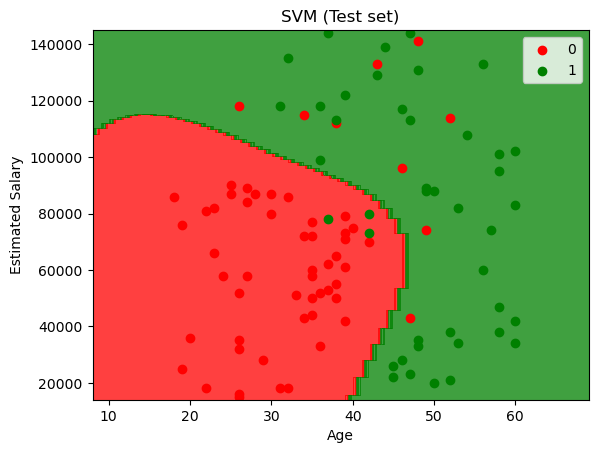

In [79]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\3156101241.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


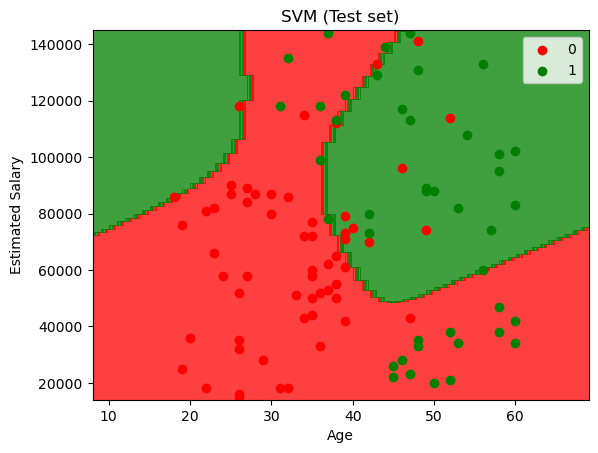

In [80]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier3.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\4131706191.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


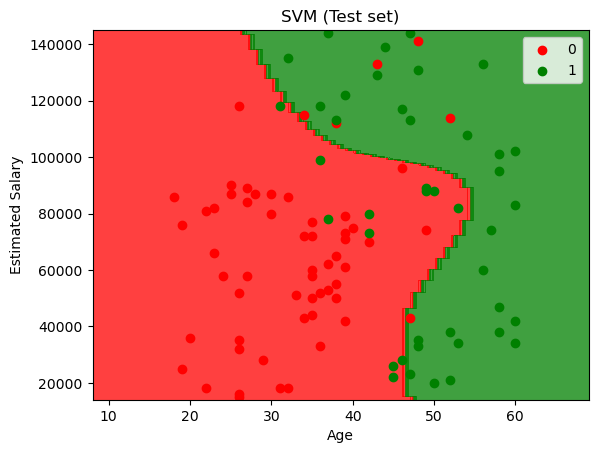

In [81]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier4.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

---

### ***Check example***

In [82]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier1.predict(sc.transform([[30, 87000]])))

[0]


In [83]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier2.predict(sc.transform([[30, 87000]])))

[0]


In [84]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier3.predict(sc.transform([[30, 87000]])))

[0]


In [86]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier4.predict(sc.transform([[30, 87000]])))

[0]


---

### ***NOW WE WILL DO WITH PARAMETER OF THE KERNEL WE ARE USING***

---

### ***MODELING***

In [104]:
# 1. Scaling is MANDATORY for sigmoid kernels to prevent performance collapse
## Sigmoid
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize with sigmoid and enable probability for your PR curve
classifier_sigmoid = SVC(
    kernel='sigmoid', 
    gamma='scale',     # Adjusts influence of training samples
    coef0=0.0,         # Independent term (bias) in the kernel function
    C=1.0,             # Regularization parameter
    probability=True   # Fixes your "AttributeError: no predict_proba"
)

# 3. Fit the model
classifier_sigmoid.fit(X_train_scaled, y_train)

# 4. Now your PR curve code will work
y_pred_proba = classifier_sigmoid.predict_proba(X_test_scaled)[:, 1]

In [105]:
# Initialize RBF
classifier_rbf = SVC(
    kernel='rbf', 
    gamma='scale',     # Controls the spread of the kernel
    C=1.0,             # Regularization
    probability=True
)

# Fit and Predict
classifier_rbf.fit(X_train_scaled, y_train)
y_pred_proba_rbf = classifier_rbf.predict_proba(X_test_scaled)[:, 1]

In [106]:
# Initialize Polynomial
classifier_poly = SVC(
    kernel='poly', 
    degree=3,          # Degree of the polynomial (default is 3)
    gamma='scale', 
    coef0=1.0,         # Important for Poly: controls how much high-degree terms influence the model
    C=1.0, 
    probability=True
)

# Fit and Predict
classifier_poly.fit(X_train_scaled, y_train)
y_pred_proba_poly = classifier_poly.predict_proba(X_test_scaled)[:, 1]

In [107]:
# Initialize Linear
classifier_linear = SVC(
    kernel='linear', 
    C=1.0, 
    probability=True   # Linear doesn't use gamma or degree
)

# Fit and Predict
classifier_linear.fit(X_train_scaled, y_train)
y_pred_proba_linear = classifier_linear.predict_proba(X_test_scaled)[:, 1]

---

### ***Prediction results on training set with the kernel parameter***

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\4028291022.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


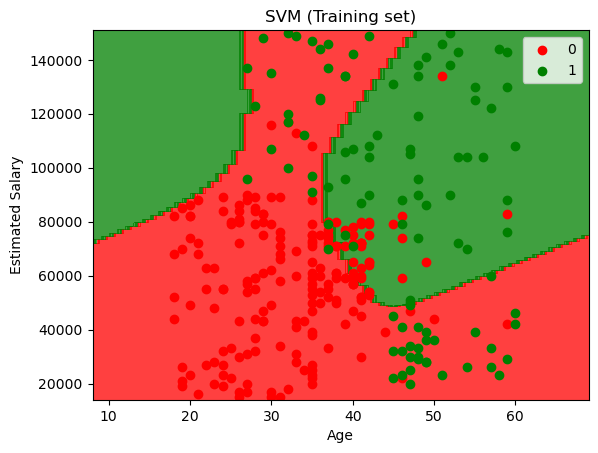

In [108]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_sigmoid.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\3583754364.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


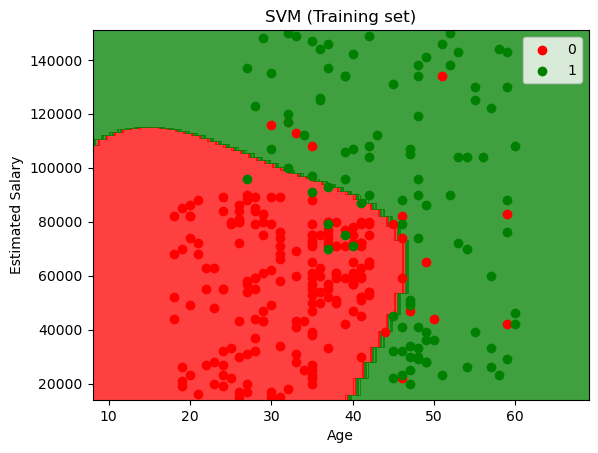

In [109]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_rbf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\346137118.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


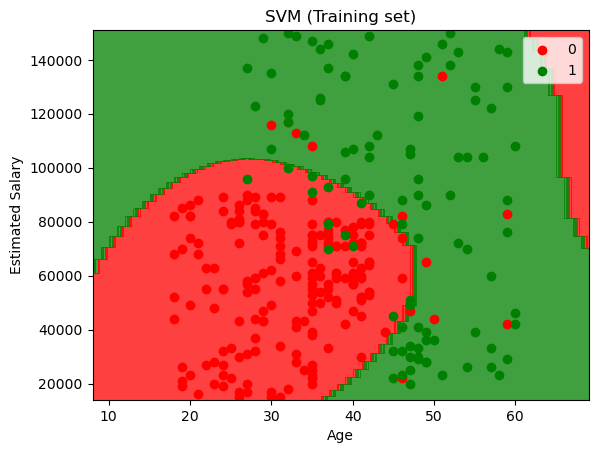

In [110]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_poly.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\2939990956.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


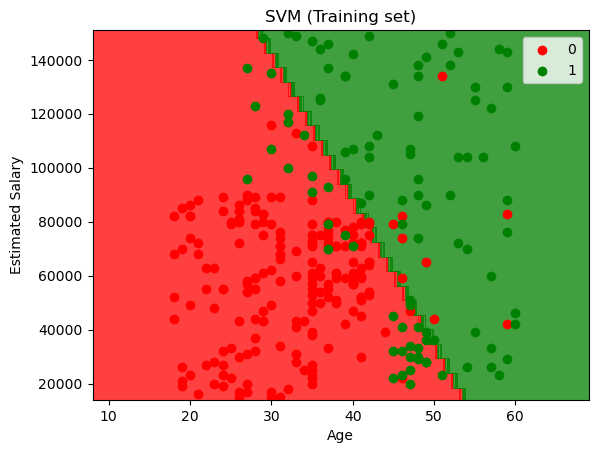

In [111]:
# Visualize prediction results on training set
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_linear.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

---

### ***Prediction results on test set with the kernel parameter***

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\1711155774.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


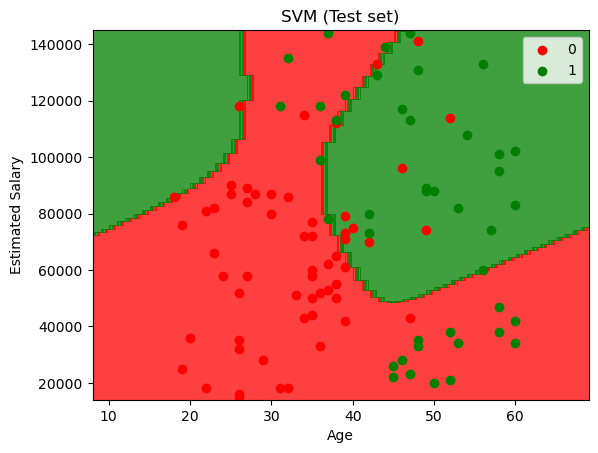

In [112]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_sigmoid.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\1197943954.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


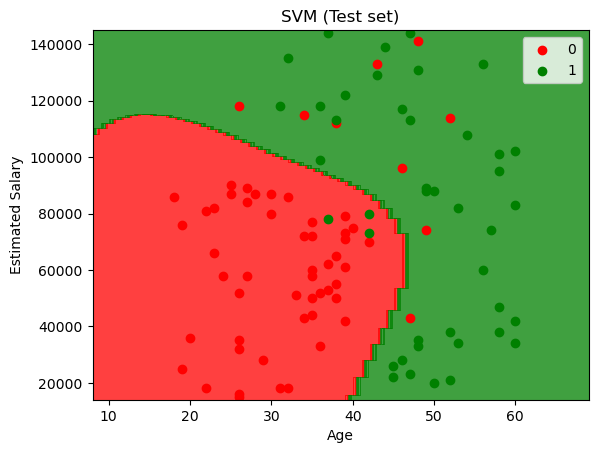

In [113]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_rbf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\1063236091.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


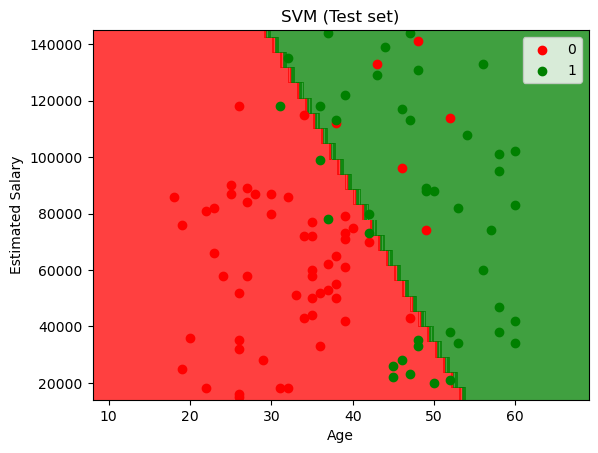

In [114]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_linear.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_16372\3733331200.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


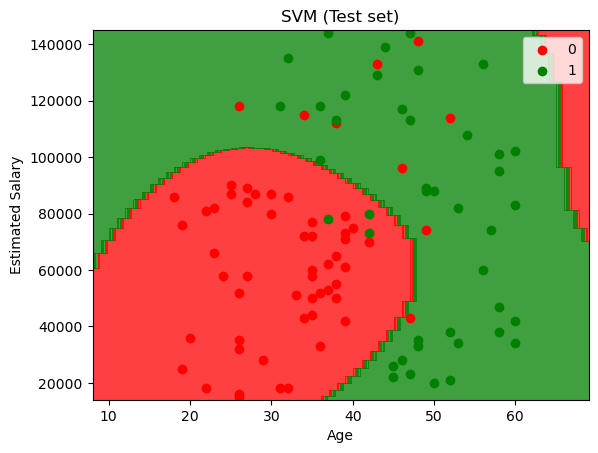

In [115]:
# Visualize prediction results on test set
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier_poly.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

---

### ***Check example***

In [116]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier_sigmoid.predict(sc.transform([[30, 87000]])))

[0]


In [117]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier_poly.predict(sc.transform([[30, 87000]])))

[0]


In [118]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier_rbf.predict(sc.transform([[30, 87000]])))

[0]


In [119]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier_linear.predict(sc.transform([[30, 87000]])))

[0]


---

### ***CHECKING ARRURACY OF THE ALL THE KERNEL IN SVM (SUPPORT VECTOR MACHINE)***

In [58]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

trained_models = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True)
    svm_model.fit(X_train, y_train)
    
    # store trained model
    trained_models[kernel] = svm_model


---

### ***Evaluate Training performance***

In [59]:
print("\nTRAINING SET PERFORMANCE")
print("="*70)

for kernel, model in trained_models.items():
    print("\n" + "-"*70)
    print(f"SVM Training Results – {kernel.upper()} Kernel")
    print("-"*70)
    
    y_train_pred = model.predict(X_train)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    print(f"Training Accuracy : {acc_train:.4f}")
    print(f"Training F1 Score : {f1_train:.4f}")
    
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))



TRAINING SET PERFORMANCE

----------------------------------------------------------------------
SVM Training Results – LINEAR Kernel
----------------------------------------------------------------------
Training Accuracy : 0.8400
Training F1 Score : 0.7273

Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       199
           1       0.85      0.63      0.73       101

    accuracy                           0.84       300
   macro avg       0.84      0.79      0.81       300
weighted avg       0.84      0.84      0.83       300


----------------------------------------------------------------------
SVM Training Results – RBF Kernel
----------------------------------------------------------------------
Training Accuracy : 0.9233
Training F1 Score : 0.8900

Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       199
       

---

### ***Evaluate TESTING performance***

In [60]:
print("\nTEST SET PERFORMANCE")
print("="*70)

for kernel, model in trained_models.items():
    print("\n" + "-"*70)
    print(f"SVM Testing Results – {kernel.upper()} Kernel")
    print("-"*70)
    
    y_test_pred = model.predict(X_test)
    
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    print(f"Test Accuracy : {acc_test:.4f}")
    print(f"Test F1 Score : {f1_test:.4f}")
    
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred))



TEST SET PERFORMANCE

----------------------------------------------------------------------
SVM Testing Results – LINEAR Kernel
----------------------------------------------------------------------
Test Accuracy : 0.8200
Test F1 Score : 0.7692

Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100


----------------------------------------------------------------------
SVM Testing Results – RBF Kernel
----------------------------------------------------------------------
Test Accuracy : 0.8800
Test F1 Score : 0.8667

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        58
           1       0.81      0.93    

In [61]:
# -------------------------------
# FINAL COMPARISON TABLE
# -------------------------------
print("## 📊 FINAL COMPARISON SUMMARY\n")
print("| Kernel | Train Accuracy | Test Accuracy | Train F1 | Test F1 |")
print("|--------|---------------|--------------|----------|---------|")

for kernel, s in results.items():
    print(
        f"| {kernel.capitalize()} | "
        f"{s['train_acc']*100:.2f}% | "
        f"{s['test_acc']*100:.2f}% | "
        f"{s['train_f1']:.4f} | "
        f"{s['test_f1']:.4f} |"
    )

## 📊 FINAL COMPARISON SUMMARY

| Kernel | Train Accuracy | Test Accuracy | Train F1 | Test F1 |
|--------|---------------|--------------|----------|---------|
| Linear | 84.00% | 82.00% | 0.7273 | 0.7692 |
| Rbf | 92.33% | 88.00% | 0.8900 | 0.8667 |
| Poly | 87.67% | 82.00% | 0.7861 | 0.7692 |
| Sigmoid | 69.33% | 66.00% | 0.4945 | 0.5278 |


---

### ***📌 SVM KERNEL WISE TRAIN vs TEST PERFORMANCE***

#### ***🔹 LINEAR KERNEL***
- *IN TRAINING*
  > Accuracy = 84.00%
  
  > F1 Score = 0.7273
  
- *IN TESTING*
  > Accuracy = 82.00%
  
  > F1 Score = 0.7692
➡️ Model shows GOOD GENERALIZATION.

### ***🔹 RBF KERNEL***
- *IN TRAINING*
  > Accuracy = 92.33%
  
  > F1 Score = 0.8900

- *IN TESTING*
  > Accuracy = 88.00%
  
  > F1 Score = 0.8667
➡️ Model performance is AVERAGE.

### ***🔹 POLY KERNEL***
- *IN TRAINING*
  > Accuracy = 87.67%
  
  > F1 Score = 0.7861

- *IN TESTING*
  > Accuracy = 82.00%
  
  > F1 Score = 0.7692
➡️ Model shows OVERFITTING.

### ***🔹 SIGMOID KERNEL***

- *IN TRAINING*
  > Accuracy = 69.33%
  
  > F1 Score = 0.4945

- *IN TESTING*
  > Accuracy = 66.00%
  
  > F1 Score = 0.5278
➡️ Model performance is AVERAGE.


---

# ✅ Final Result – Social Network Ads (SVM)

- Linear Kernel → Good performance
- RBF Kernel → Best accuracy
- Polynomial → Slight overfitting possible
- Sigmoid → Less stable

## 🏆 Best Model:
RBF kernel gives the highest testing accuracy.

SVM successfully predicts whether a user will purchase the product based on Age and Estimated Salary.